  ## Importing Python Libraries 

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

## Load dataset, explore it  and split it into train, validation and test sets

- [Load CIFAR-10 Keras](https://www.cs.toronto.edu/~kriz/cifar.html)

In [3]:
# Loading the data using the Keras function
(X_dev, Y_dev), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data() # The data comes already split 
                                                                        # in dev and test sets
print("Development set")
print("Images: ",X_dev.shape)
print("Labels shape:",Y_dev.shape)
print("\nNumber of classes:",np.unique(Y_dev).size)
print("\nClasses:",np.unique(Y_dev))
print("\nTest set")
print("Images: ",X_test.shape)
print("Labels shape: ",Y_test.shape)

Development set
Images:  (50000, 32, 32, 3)
Labels shape: (50000, 1)

Number of classes: 10

Classes: [0 1 2 3 4 5 6 7 8 9]

Test set
Images:  (10000, 32, 32, 3)
Labels shape:  (10000, 1)


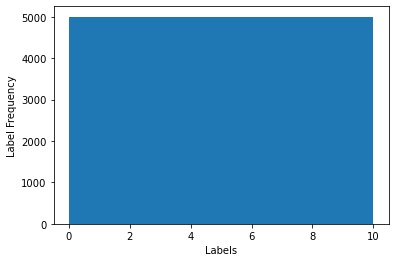

In [4]:
plt.figure()
plt.hist(Y_dev, bins = range(11))
plt.xlabel("Labels")
plt.ylabel("Label Frequency")
plt.show()

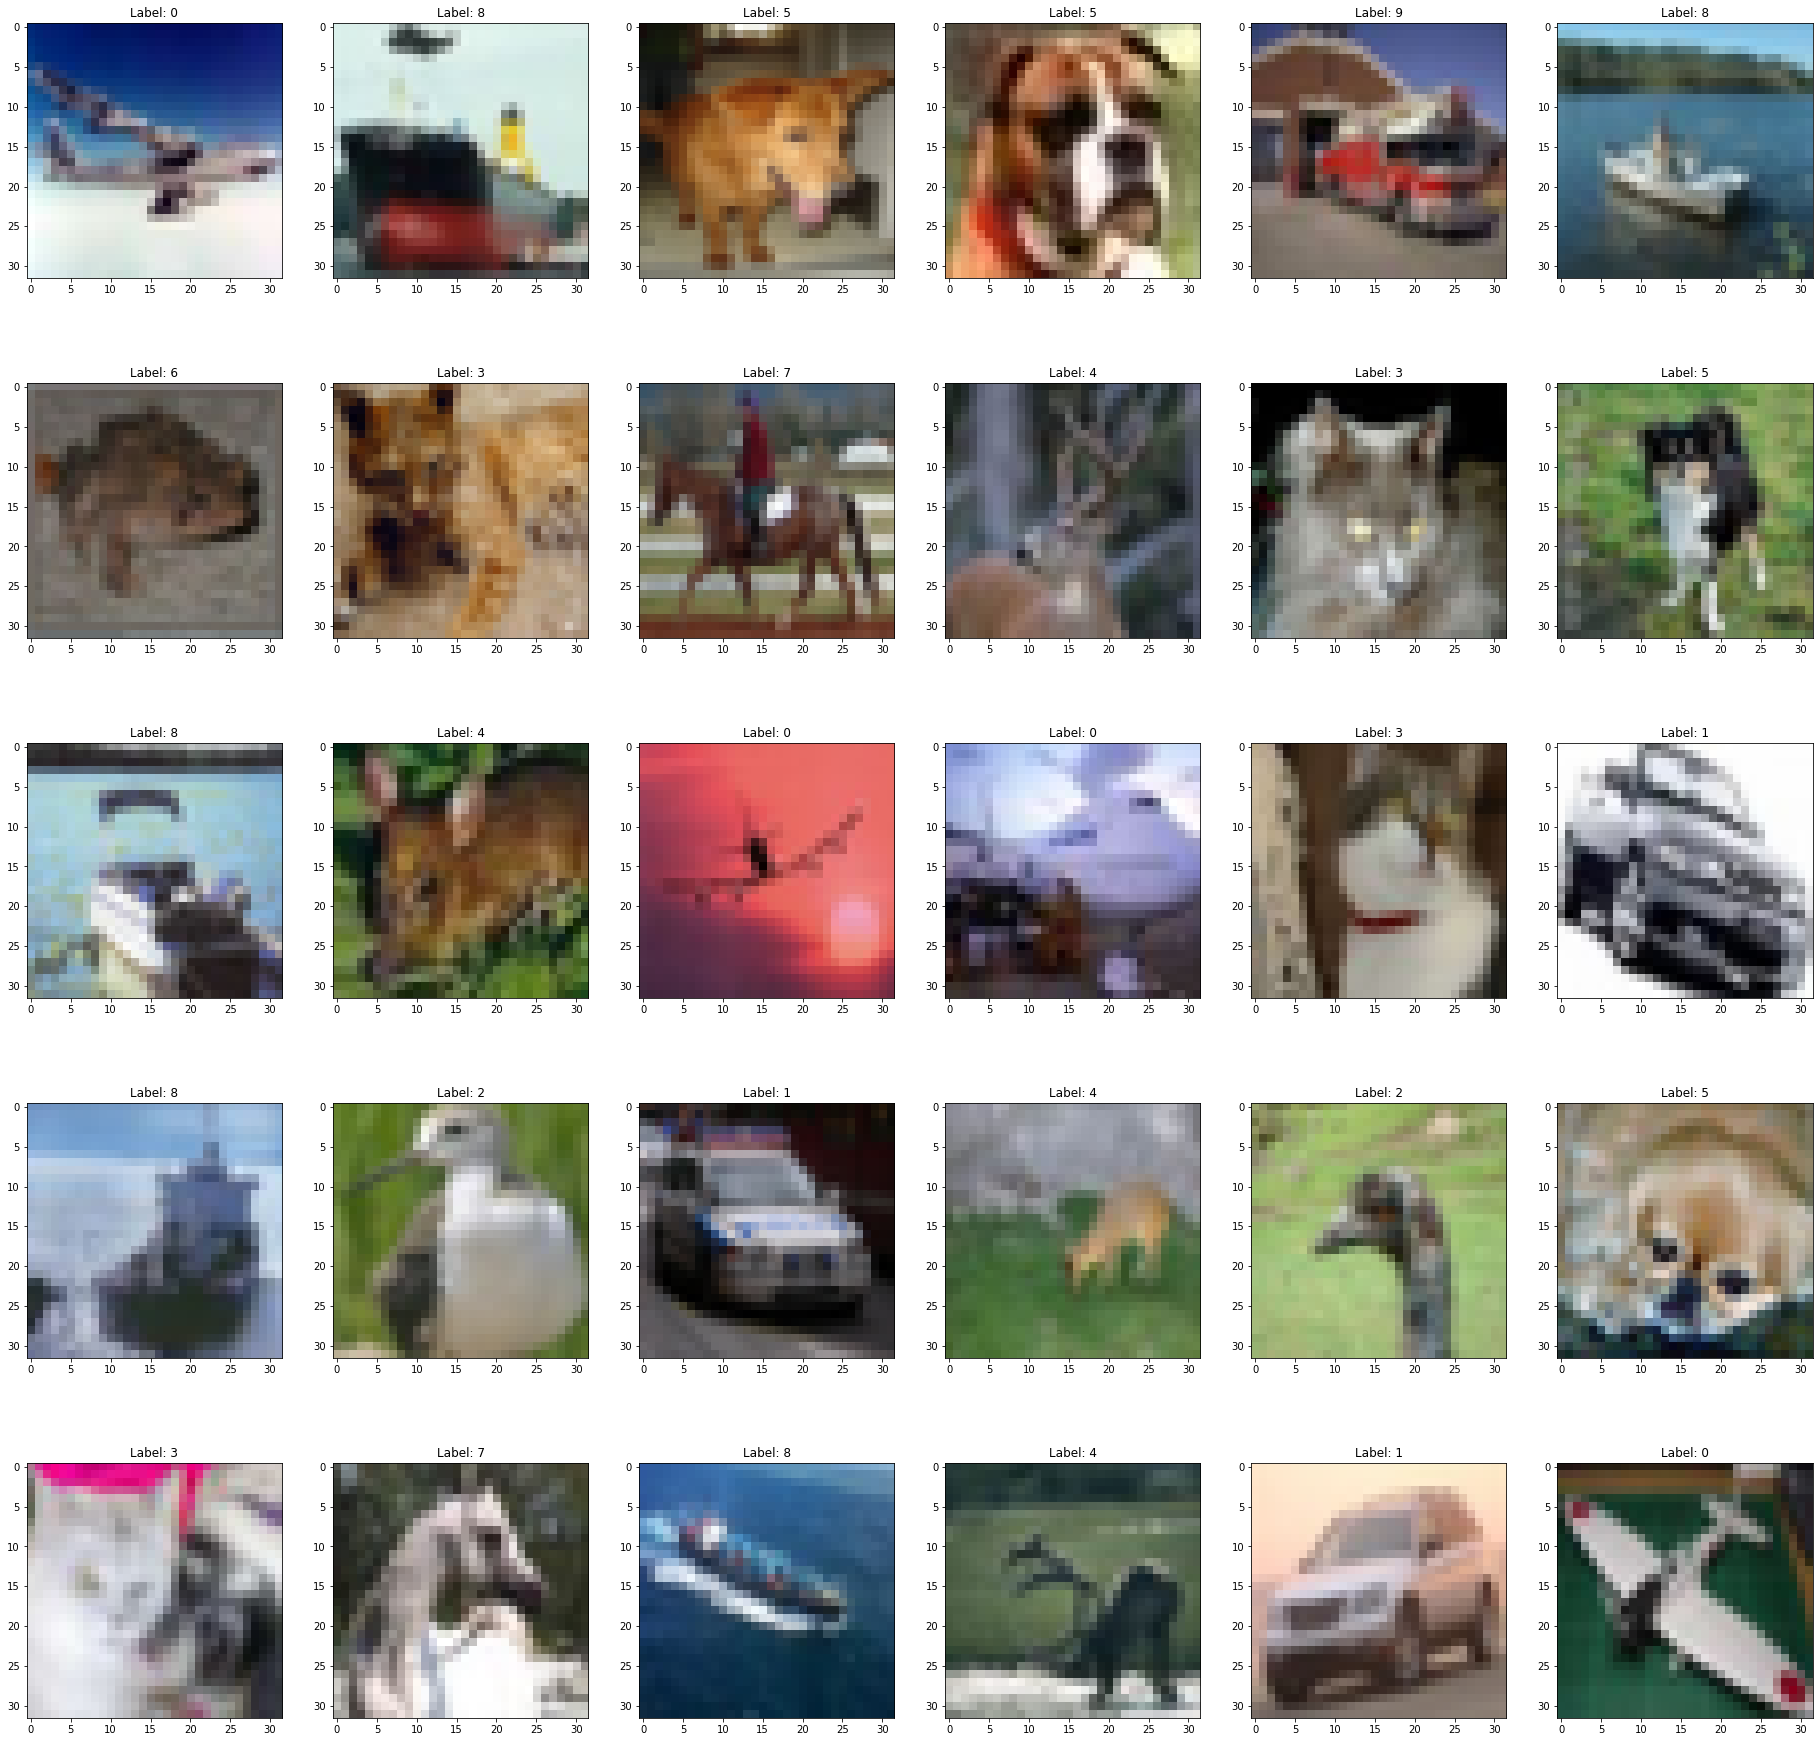

In [27]:
# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(X_dev.shape[0], dtype = int),size = 30, replace = False)
plt.figure(figsize = (32,32))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    plt.imshow(X_dev[jj], cmap = "viridis")
    plt.title("Label: %d" %Y_dev[jj])
plt.show()

In [9]:
#The number of classes across samples looks balanced
# Let's shuffle the samples and split them

indexes = np.arange(X_dev.shape[0], dtype = int)
np.random.shuffle(indexes)
X_dev = X_dev[indexes]
Y_dev = Y_dev[indexes]

nsplit = int(0.75*X_dev.shape[0]) # Train/validation split

# Train and validation split

# Include your solution below
X_train = X_dev[:nsplit]
Y_train = Y_dev[:nsplit]
X_val = X_dev[nsplit:]
Y_val = Y_dev[nsplit:]

print("\nTrain set")
print("Images: ",X_train.shape)
print("Labels shape: ",Y_train.shape)
print("\nValidation set")
print("Images: ",X_val.shape)
print("Labels shape: ",Y_val.shape)


Train set
Images:  (37500, 32, 32, 3)
Labels shape:  (37500, 1)

Validation set
Images:  (12500, 32, 32, 3)
Labels shape:  (12500, 1)


In [10]:
print(X_train.min(),X_train.max(),X_train.mean(),X_train.std())
print(X_val.min(),X_val.max(),X_val.mean(),X_val.std())

0 255 120.71768969618056 64.21044559037831
0 255 120.67719140625 63.96861534000906


## 2. Data Scaling 

In [11]:
norm_type = 0 # 0 -> min-max; 1-> standardization

if norm_type == 0:
    X_train = X_train/255
    X_val = X_val/255
    X_test = X_test/255
elif norm_type == 1:
    train_mean, train_std = X_train.mean(),X_train.std() 
    X_train = (X_train - train_mean)/train_std
    X_val = (X_val - train_mean)/train_std
    X_test = (X_test - train_mean)/train_std
else:
    pass

## 3. One hot encoding

In [12]:
Y_train_oh = tf.keras.utils.to_categorical(Y_train)
Y_val_oh = tf.keras.utils.to_categorical(Y_val)
Y_test_oh = tf.keras.utils.to_categorical(Y_test)

print("Labels:")
print(Y_train[:5])
print()
print("One hot encoded labels:")
print(Y_train_oh[:5])

Labels:
[[1]
 [7]
 [7]
 [7]
 [9]]

One hot encoded labels:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 4. Define your model, cost function, optimizer, learning rate

In [28]:
# you must create a convolutional neural network model with 8 layers (1 input layer, 3 convolutional layers, 
# 2 dropout layers, 1 max pooling layer, 1 output layer)

def my_model(ishape = (32,32,3),k = 10, lr = 1e-4):
    # Include your solution below
    model_input = tf.keras.layers.Input(shape = ishape)
    l1 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(model_input)
    l2 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(l1)
    l2_drop = tf.keras.layers.Dropout(0.25)(l2)
    l3 = tf.keras.layers.MaxPool2D((2,2))(l2_drop)
    l4 = tf.keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(l3)
    l4_drop = tf.keras.layers.Dropout(0.25)(l4)
    flat = tf.keras.layers.Flatten()(l4_drop)
    out = tf.keras.layers.Dense(k,activation = 'softmax')(flat)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])
    return model

In [29]:
model = my_model()
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 48)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 96)        41568     
                                                           

## 5. Define your callbacks (save your model, patience, etc.)

- [Keras callbacks](https://keras.io/api/callbacks/)

In [30]:
model_name = "best_model_mnist_cnn.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%10 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

## 6. Train your model

In [32]:
my_epochs = 10
my_batch_size = 32

model.fit(X_train, Y_train_oh, batch_size = my_batch_size, epochs = my_epochs, \
          verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=(X_val,Y_val_oh))

Epoch 1/10
1172/1172 [==============================] - 120s 102ms/step - loss: 1.7643 - accuracy: 0.3743 - val_loss: 1.5922 - val_accuracy: 0.4547 - lr: 5.0000e-05
Epoch 2/10
1172/1172 [==============================] - 124s 106ms/step - loss: 1.4684 - accuracy: 0.4813 - val_loss: 1.4475 - val_accuracy: 0.5010 - lr: 5.0000e-05
Epoch 3/10
1172/1172 [==============================] - 124s 106ms/step - loss: 1.3506 - accuracy: 0.5237 - val_loss: 1.3693 - val_accuracy: 0.5295 - lr: 5.0000e-05
Epoch 4/10
1172/1172 [==============================] - 107s 91ms/step - loss: 1.2741 - accuracy: 0.5514 - val_loss: 1.3194 - val_accuracy: 0.5507 - lr: 5.0000e-05
Epoch 5/10
1172/1172 [==============================] - 107s 91ms/step - loss: 1.2168 - accuracy: 0.5715 - val_loss: 1.2751 - val_accuracy: 0.5721 - lr: 5.0000e-05
Epoch 6/10
1172/1172 [==============================] - 115s 98ms/step - loss: 1.1693 - accuracy: 0.5903 - val_loss: 1.2255 - val_accuracy: 0.5826 - lr: 5.0000e-05
Epoch 7/10
11

## 7. Test your model on the test and extract relevant metrics

In [33]:
model.load_weights(model_name)
metrics = model.evaluate(X_test,Y_test_oh)
print("Categorical cross-entropy:", metrics[0])
print("Accuracy:", metrics[1])

313/313 [==============================] - 5s 15ms/step - loss: 1.0835 - accuracy: 0.6324
Categorical cross-entropy: 1.0834704637527466
Accuracy: 0.6323999762535095


313/313 [==============================] - 5s 15ms/step
90000000


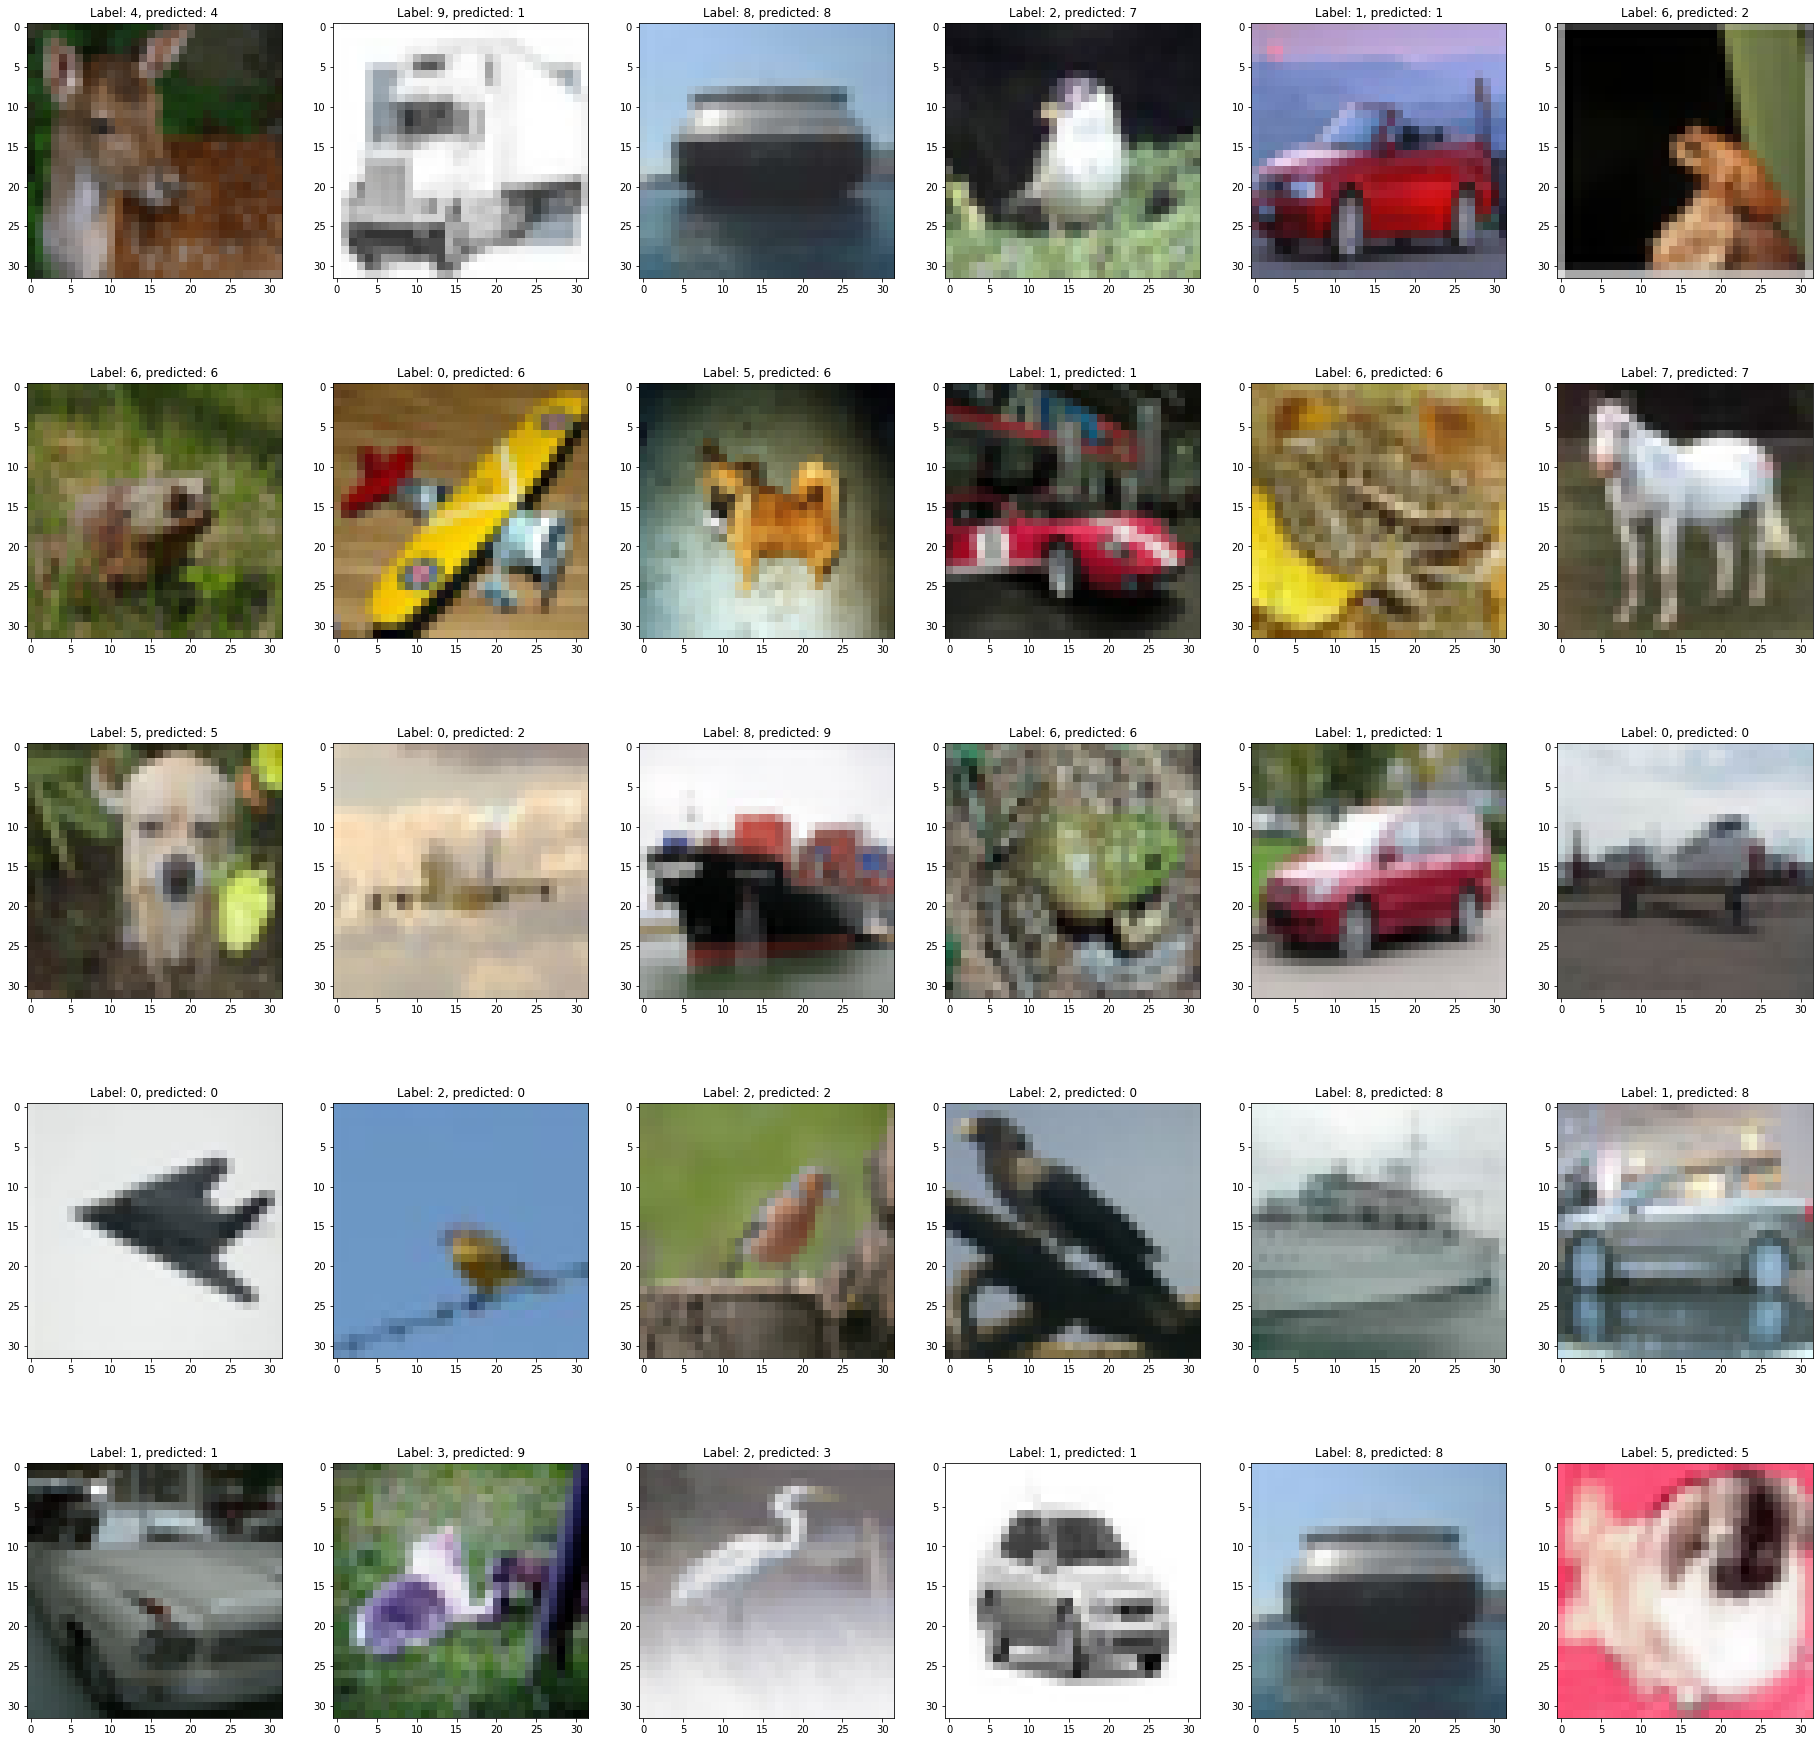

In [34]:
Ypred = model.predict(X_test).argmax(axis = 1)
wrong_indexes = np.where(Ypred != Y_test)[0]
print(wrong_indexes.size)

# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 30, replace = False)
plt.figure(figsize = (32,32))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    plt.imshow(X_test[wrong_indexes[jj]], cmap = "viridis")
    plt.title("Label: %d, predicted: %d" %(Y_test[wrong_indexes[jj]],Ypred[wrong_indexes[jj]]))
plt.show()